# FFT in Multiple Dimensions

We can extend our FFT to more than one dimension.  Consider the 2-d case:

\begin{align*}
F_{k_x,k_y} &= \sum_{m =0}^{N_x - 1} \sum_{n=0}^{N_y -1}
f_{mn} e^{-2\pi i (k_x m/N_x + k_y n/N_y)} \\
 &= \sum_{m =0}^{N_x - 1} 
e^{-2\pi i k_x m/N_x}
\underbrace{\sum_{n=0}^{N_y -1} f_{mn} e^{-2\pi i k_y n/N_y}}_{\mbox{this is the y transform}}
\end{align*}

We see that we can decompose the multi-dimensional transform into a sequence of one-dimensional FFTs.

## Example: FFT of my dog

Here's an image of my dog:

![my dog Luna](luna_bw.png)

download: [luna_bw.png](luna_bw.png)

Let's take the FFT.  We'll use the built in NumPy FFT routines.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

First let's read the image in as an array

In [28]:
f = plt.imread("luna_bw.png")
f.shape

(256, 256)

Now let's take the FFT

In [29]:
F = np.fft.fft2(f)

We can shift the spectrum so the k = 0 wavenumbers are at the center, using [`numpy.fft.fftshift()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html)

In [30]:
F_shift = np.fft.fftshift(F)

Now we can plot the amplitude and the phase (which we can get from [`numpy.angle()`](https://numpy.org/doc/stable/reference/generated/numpy.angle.html)

In [31]:
F_mag = np.abs(F_shift)
F_phase = np.angle(F_shift)

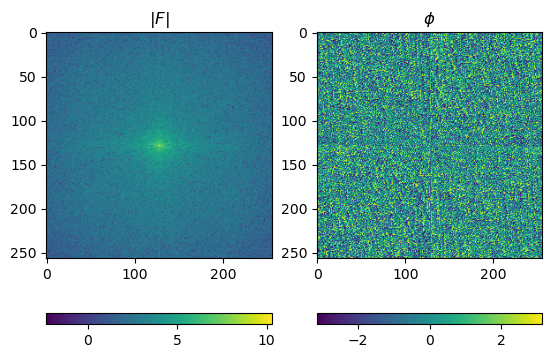

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
im = ax1.imshow(np.log(F_mag))
ax1.set_title(r"$|F|$")
fig.colorbar(im, ax=ax1, orientation="horizontal")

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(F_phase)
ax2.set_title(r"$\phi$")
fig.colorbar(im2, ax=ax2, orientation="horizontal")

Let's filter out high frequencies

In [33]:
ix, iy = np.mgrid[0:F_shift.shape[0], 0:F_shift.shape[1]]
ix -= F_shift.shape[0]//2
iy -= F_shift.shape[1]//2

In [44]:
F_filtered = F_shift.copy()
F_filtered[np.hypot(ix, iy) > 25] = 0.0

/tmp/ipykernel_835635/1388428532.py:2: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.log(np.abs(F_filtered)))


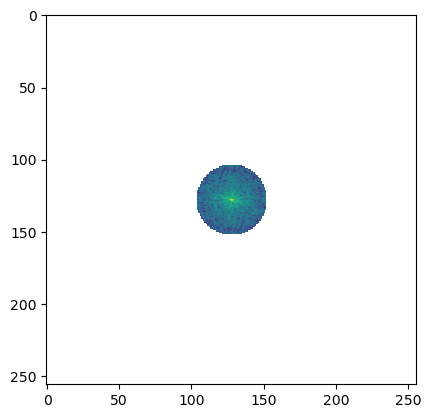

In [45]:
fig, ax = plt.subplots()
ax.imshow(np.log(np.abs(F_filtered)))

Let's transform this back and see the result

In [48]:
f_filtered = np.fft.ifft2(np.fft.ifftshift(F_filtered))

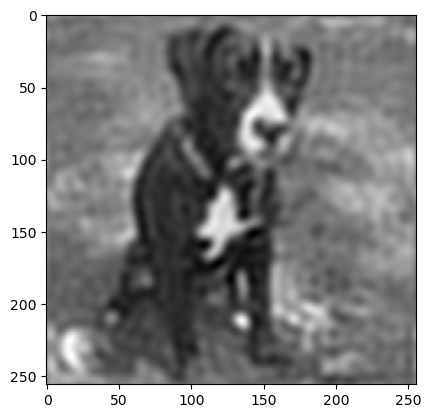

In [53]:
fig, ax = plt.subplots()
ax.imshow(f_filtered.real, cmap="gray")

## Application: Turbulent Power Spectrum

One of the ways this is used frequently in astrophysics is to compute the power spectrum of a velocity field to look at the
[turbulence](https://en.wikipedia.org/wiki/Turbulence) properties.

For a simulation with velocity components $u$, $v$, and $w$, we compute the power spectrum as:

$$E(k) = \int_{k=|k|} dk [ \hat{u}(k)^2 + \hat{v}(k)^2 + \hat{w}(k)^2 ]$$

where $k$ is the radial wavenumber, $k = \sqrt{k_x^2 + k_y^2 + k_z^2}$.  This gives us the power at a scake $k$.

Kolmogorov turbulence theory says that homogeneous, isotropic, incompressible turblence should scale like:

$$E(k) dk \sim k^{-5/3}$$

We can see this behavior, for example here: https://ui.adsabs.harvard.edu/abs/2005ApJ...632.1021Z/abstract, which looks at [Rayleigh-Taylor](https://en.wikipedia.org/wiki/Rayleigh%E2%80%93Taylor_instability) unstable flames.  Here's a snapshot of the flame at two points in time along with the power spectrum:

![Rayleigh-Taylor unstable flame](power_spectrum2.png)